In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
%load_ext autoreload
% autoreload

In [2]:
data= pd.read_csv('/data/Good data storage.csv')

In [3]:
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","31,32,33,34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15","17,18",1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32","34,35",1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [4]:
data = data.loc[:126]

In [5]:
data_ei = data[(data['E-I']==1) & (25 < data['Age']) & (data['Age'] < 30)]

In [6]:
patch_pip.df_ana(data_ei,'/data/data_E_I_time_constant', if_after=0)

/usr/local/lib/python3.5/dist-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/src/Patch_ana/Patch_ana/patch_pip.py:561: RuntimeWarning: overflow encountered in exp
  y = np.exp(-1 * t / decay_tau)


In [7]:
data_ei = pd.read_pickle('/data/data_E_I_time_constant')

In [8]:
data_ei.head()

,Before,After,File name
9,"{'decay_tau': [nan, nan, nan, nan, nan, nan, n...",[],2016081002
10,"{'decay_tau': [0.00111723437961, nan, nan, 0.0...",[],2016081703
11,"{'decay_tau': [nan, nan, nan, nan, nan, nan, n...",[],2016081002
12,"{'decay_tau': [nan, 0.00145553535227, 0.000889...",[],2016092903
14,"{'decay_tau': [0.00145300851919, nan, 0.001207...",[],2016091201


In [9]:
data_ei.iloc[9].Before.keys()

dict_keys(['decay_tau', 'trace_y2', 'raw_decay_tau', 'ir', 'onset_tau', 'raw_amp1', 'trace_y1', 'PPR', 'x', 'raw_onset_tau', 'resp1_region', 'failure', 'ave_amp1', 'ave_all', 'resp2_region', 'rs', 'spon_trace', 'raw_amp2', 'ave_amp2'])

In [11]:
amp1_ei = []
decay_tau_ei = []
for i in range(len(data_ei)):
    amp1_ei.append(data_ei.iloc[i].Before['raw_amp1'])
    decay_tau_ei.append(data_ei.iloc[i].Before['raw_decay_tau'])
    
decay_tau_ei = np.hstack(decay_tau_ei)
amp1_ei = np.hstack(amp1_ei)

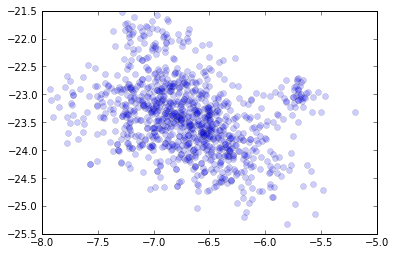

In [12]:
plt.plot(np.log(decay_tau_ei), np.log(amp1_ei), 'o', alpha=0.2)

In [13]:
data_ii = data[data['E-I']==2]

In [14]:
data_ii

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
64,2016081801,27,1,2,1,1,1,"12,13,14","16,17,18,19",7,0,Disynaptic response,50HZ II preonly
65,2016092802,28,2,2,1,1,1,"10,12","14,15,16,17",7,0,NaN,50HZ II preonly
66,2016102101,26,2,2,0,0,2,"11,12","14,15,16,17,18,19,20",8,0,No change,50Hz II high freq
68,2016110103,30,1,2,0,1,2,"18,19,20","22,23,24,25,26,27",8,0,No change or weak LTD,50Hz II high freq
69,2016120401,28,2,2,0,0,2,"11,12,13","15,16,17,18",8,0,LTP,50Hz II high freq
70,2016120401,28,1,2,0,0,2,"11,12,13","15,16,17,18",8,0,LTP,50Hz II high freq


In [15]:
patch_pip.df_ana(data_ii,'/data/data_I_I_time_constant', if_after=0)

In [16]:
data_ii = pd.read_pickle('/data/data_I_I_time_constant')

In [17]:
amp1_ii = []
decay_tau_ii = []
for i in range(len(data_ii)):
    amp1_ii.append(data_ii.iloc[i].Before['raw_amp1'])
    decay_tau_ii.append(data_ii.iloc[i].Before['raw_decay_tau'])
    
decay_tau_ii = np.hstack(decay_tau_ii)
amp1_ii = np.hstack(amp1_ii)

In [18]:
np.random.permutation(len(decay_tau_ei))

array([1149, 1380,  909, ..., 1209,  646,   35])

In [19]:
index = np.arange(len(decay_tau_ei))
index = index[np.random.permutation(len(decay_tau_ei))]

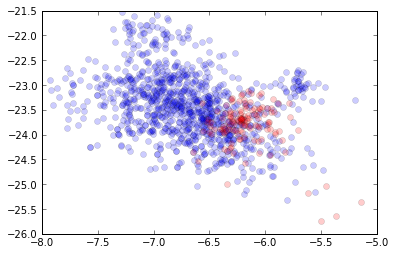

In [20]:
plt.plot(np.log(decay_tau_ei), np.log(amp1_ei), 'o', alpha=0.2)
plt.plot(np.log(decay_tau_ii), np.log(amp1_ii),'ro', alpha=0.2)

In [21]:
np.exp(-8)

0.00033546262790251185

In [22]:
np.exp(-6)

0.0024787521766663585

In [23]:
data_naspm = pd.read_pickle('/data/ana_naspm')

In [24]:
data_naspm

,Before,After,File name,elimi,spon_elimi_bef,spon_elimi_aft
127,"{'ave_all': [[1.03766992635e-12, 1.03235889696...","{'ave_all': [[1.24257760682e-12, 1.35762169219...",2017091301,25,NaN,"[32, 33]"
128,"{'ave_all': [[1.19821837081e-12, 1.28564496456...","{'ave_all': [[3.01022929299e-12, 3.08001964704...",2017091202,30,NaN,"[54, 55, 56, 57, 58]"
129,"{'ave_all': [[2.27816418902e-12, 2.1371463601e...","{'ave_all': [[3.94663764661e-12, 4.03007958053...",2017092702,20,NaN,"[17, 24, 31]"
130,"{'ave_all': [[1.91845145164e-13, 2.69864035341...","{'ave_all': [[1.05780641404e-12, 1.15144609339...",2017092901,40,NaN,"[57, 66]"
132,"{'ave_all': [[7.37490194004e-13, 8.24851215199...","{'ave_all': [[6.8911055236e-13, 8.08197627631e...",2017102501,40,NaN,"[37, 40, 41, 47, 49, 51, 52, 53, 54, 55, 56, 5..."


In [25]:
amp1_naspm_bef = []
decay_naspm_bef = []
for i in range(len(data_naspm)):
    amp1_naspm_bef.append(data_naspm.iloc[i].Before['raw_amp1'])
    decay_naspm_bef.append(data_naspm.iloc[i].Before['raw_decay_tau'])
    
decay_naspm_bef = np.hstack(decay_naspm_bef)
amp1_naspm_bef = np.hstack(amp1_naspm_bef)

In [26]:
amp1_naspm_aft = []
decay_naspm_aft = []
for i in range(len(data_naspm)):
    amp1_naspm_aft.append(data_naspm.iloc[i].After['raw_amp1'])
    decay_naspm_aft.append(data_naspm.iloc[i].After['raw_decay_tau'])
    
decay_naspm_aft = np.hstack(decay_naspm_aft)
amp1_naspm_aft = np.hstack(amp1_naspm_aft)

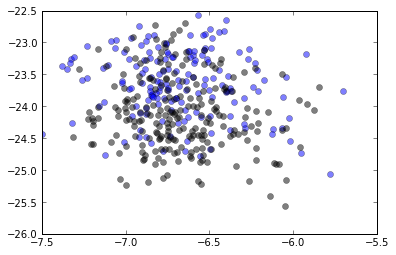

In [27]:
plt.plot(np.log(decay_naspm_bef), np.log(amp1_naspm_bef), 'o', alpha=0.5)
plt.plot(np.log(decay_naspm_aft), np.log(amp1_naspm_aft), 'ko', alpha=0.5)

In [28]:
len(decay_naspm_aft)

435

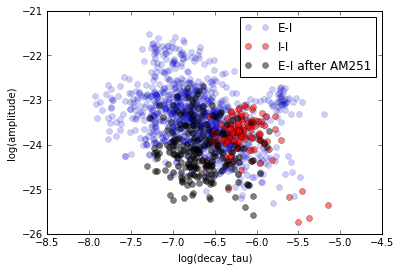

In [36]:
plt.plot(np.log(decay_tau_ei), np.log(amp1_ei), 'o', alpha=0.2, label='E-I')
plt.plot(np.log(decay_tau_ii), np.log(amp1_ii),'ro', alpha=0.5, label='I-I')
plt.plot(np.log(decay_naspm_aft), np.log(amp1_naspm_aft), 'ko', alpha=0.5, label='E-I after AM251')
plt.xlabel('log(decay_tau)')
plt.ylabel('log(amplitude)')
plt.xlim([-8.5,-4.5])


plt.ylim([-26,-21])
plt.legend()